# Evaluating Regression Models Exercises

1. Load the tips dataset from either pydataset or seaborn

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

from env import user, host, password
import explore
import acquire

import os
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt

In [2]:
df = sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [3]:
baseline = df.tip.mean()
df['tip_baseline'] = baseline
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_baseline
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279


In [4]:
from sklearn.linear_model import LinearRegression

# generate parameters, i.e. create model
ols_model = LinearRegression().fit(df[['total_bill']], df.tip)

# compute predictions and add to original dataframe
df['yhat'] = ols_model.predict(df[['total_bill']])

df.head(3)


,total_bill,tip,sex,smoker,day,time,size,tip_baseline,yhat
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835


3. Plot the residuals for the linear regression model that you made.

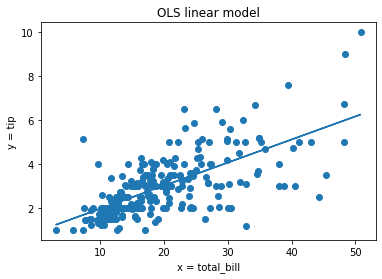

In [6]:
# visualize the line of best fit from OLS linear model
plt.scatter(df.total_bill, df.tip)
plt.plot(df.total_bill, df.yhat)
plt.xlabel('x = total_bill')
plt.ylabel('y = tip')
plt.title('OLS linear model');

4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [7]:
# residual = actual - predicted
df['residual'] = df.tip - df.yhat
df['baseline_residual'] = df.tip - df.tip_baseline
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_baseline,yhat,residual,baseline_residual
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.988279
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-1.338279
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.501721
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.097250,0.311721
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.107178,0.611721


In [8]:
# sum of residual is zero
df.residual.sum()

8.171241461241152e-14

In [9]:
df.baseline_residual.sum()

-2.4868995751603507e-14

# SSE

In [10]:
# first calculate the square of residuals

df['residual^2'] = df.residual**2
df['baseline_residual^2'] = df.baseline_residual**2

df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_baseline,yhat,residual,baseline_residual,residual^2,baseline_residual^2
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.988279,2.871792,3.953252
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-1.338279,0.119870,1.790990
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.501721,0.139252,0.251724
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.097250,0.311721,0.009458,0.097170
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.107178,0.611721,0.011487,0.374203


In [11]:
SSE = df['residual^2'].sum()
SSE_baseline = df['baseline_residual^2'].sum()

print('SSE =', "{:.1f}".format(SSE))
print("SSE Baseline =", "{:.1f}".format(SSE_baseline))

SSE = 252.8
SSE Baseline = 465.2


# ESS

In [15]:
ESS = ((df.yhat - df.tip_baseline)**2).sum()
ESS

212.4237331984042

# TSS

In [17]:
TSS = ((df.tip - df.tip_baseline)**2).sum()
TSS

465.2124770491804

In [18]:
SSE + ESS

465.21247704918017

# MSE

In [12]:
MSE = SSE/len(df)
MSE_baseline = SSE_baseline/len(df)

print("MSE = ", "{:.1f}".format(MSE))
print("MSE baseline = ", "{:.1f}".format(MSE_baseline))

MSE =  1.0
MSE baseline =  1.9


# RMSE

In [14]:
from math import sqrt
RMSE = sqrt(MSE)
RMSE_baseline =  sqrt(MSE_baseline)


print("RMSE = ", "{:.1f}".format(RMSE))
print("RMSE baseline = ", "{:.1f}".format(RMSE_baseline))

RMSE =  1.0
RMSE baseline =  1.4


In [19]:
R2 = ESS/TSS
R2

0.45661658635167607

5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [20]:
SSE_baseline, MSE_baseline, RMSE_baseline

(465.2124770491804, 1.906608512496641, 1.3807999538298954)

6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [21]:
if SSE < SSE_baseline:
    print("My model performs better than baseline.")
else:
    print("My model does NOT perform better than baseline.")

My model performs better than baseline.


7. What is the amount of variance explained in your model?

In [23]:
R2*100 

45.661658635167605

8. Is your model better than the baseline model?

Yes

9. Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
- - sum of squared errors (SSE)
- - explained sum of squares (ESS)
- - total sum of squares (TSS)
- - mean squared error (MSE)
- - root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [28]:
def plot_residuals():
    plt.figure(figsize = (11,5))

    plt.subplot(121)
    plt.scatter(df.total_bill, df.baseline_residual)
    plt.axhline(y = 0, ls = ':')
    plt.xlabel('x')
    plt.ylabel('Residual')
    plt.title('Baseline Residuals')

    plt.subplot(122)
    plt.scatter(df.total_bill, df.residual)
    plt.axhline(y = 0, ls = ':')
    plt.xlabel('x')
    plt.ylabel('Residual')
    plt.title('OLS model residuals');
    return plt.show()

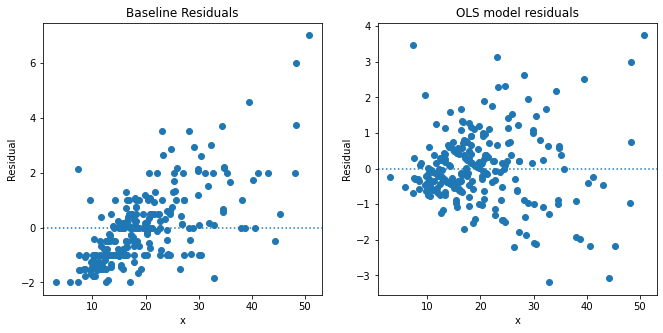

In [29]:
plot_residuals()

In [39]:
def regression_errors():
    SSE = df['residual^2'].sum()
    ESS = ((df.yhat - df.tip_baseline)**2).sum()
    TSS = ((df.tip - df.tip_baseline)**2).sum()
    MSE = SSE/len(df)
    RMSE = sqrt(MSE)
    return print(f" SSE = {SSE}\n ESS = {ESS}\n TSS = {TSS}\n MSE = {MSE}\n RMSE = {RMSE}")
    

In [40]:
regression_errors()

 SSE = 252.788743850776
 ESS = 212.4237331984042
 TSS = 465.2124770491804
 MSE = 1.036019442011377
 RMSE = 1.0178504025697377


In [42]:
def baseline_mean_errors():
    SSE_baseline = df['baseline_residual^2'].sum()
    MSE_baseline = SSE_baseline/len(df)
    RMSE_baseline =  sqrt(MSE_baseline)
    return print(f" SSE_baseline = {SSE_baseline}\n MSE_baseline = {MSE_baseline}\n RMSE_baseline = {RMSE_baseline}")

In [43]:
baseline_mean_errors()

 SSE_baseline = 465.2124770491804
 MSE_baseline = 1.906608512496641
 RMSE_baseline = 1.3807999538298954


In [46]:
def better_than_baseline():
    if SSE < SSE_baseline:
        print("My model performs better than baseline.")
        x = True
    else:
        print("My model does NOT perform better than baseline.")
        x = False
    return x

In [47]:
better_than_baseline()

My model performs better than baseline.


True

10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [48]:
df = sns.load_dataset("mpg")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [51]:
y = df.mpg
x = df.displacement
baseline = y.mean()
df['baseline'] = baseline
ols_model = LinearRegression().fit(df[['displacement']], y)
df['yhat'] = ols_model.predict(df[['displacement']])
yhat = df.yhat


In [52]:
df['residual'] = y - yhat
df['baseline_residual'] = y - baseline

In [53]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,baseline,yhat,residual,baseline_residual
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,23.514573,16.668052,1.331948,-5.514573
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,23.514573,14.075908,0.924092,-8.514573
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,23.514573,16.004945,1.995055,-5.514573
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,23.514573,16.848899,-0.848899,-7.514573
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,23.514573,16.969464,0.030536,-6.514573


In [56]:
def plot_residuals1(y, yhat):
    plt.figure(figsize = (11,5))

    plt.subplot(121)
    plt.scatter(x, (y - y.mean()))
    plt.axhline(y = 0, ls = ':')
    plt.xlabel('x')
    plt.ylabel('Residual')
    plt.title('Baseline Residuals')

    plt.subplot(122)
    plt.scatter(x, (y-yhat))
    plt.axhline(y = 0, ls = ':')
    plt.xlabel('x')
    plt.ylabel('Residual')
    plt.title('OLS model residuals');
    return plt.show()

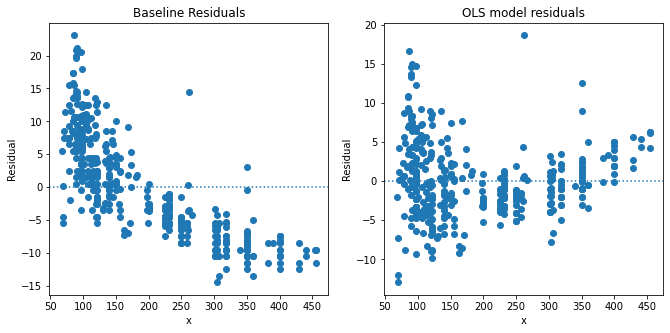

In [57]:
plot_residuals1(y, yhat)